# Melanoma Classification : Exploratory Data Analysis
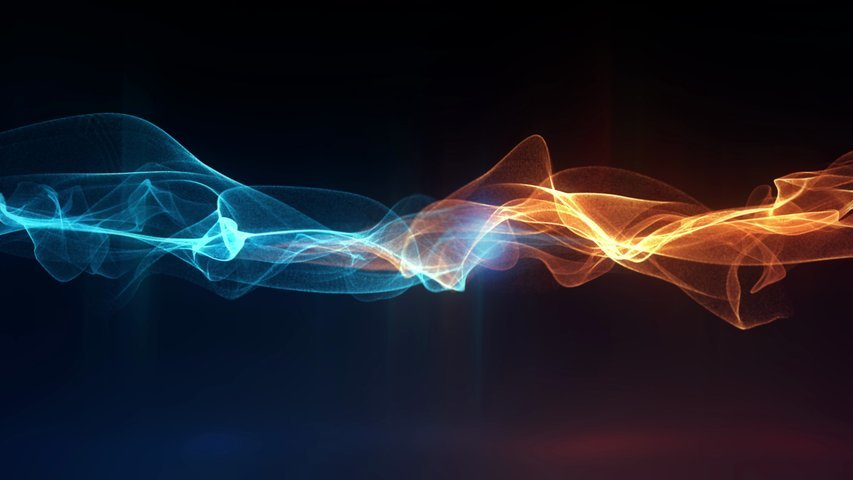 

## Notebook II of III

This notebook is the II one in my series of work in this competition. As always, shout out to amazing kernel authors present here at kaggle!! This notebook caters the area of Exploratory Data Analysis(EDA) used to derieve precious insights from the given dataset. 

## Previous works : 
* Dataset preparation(Notebook I) : 
**https://www.kaggle.com/fireheart7/melanoma-a-story-in-3-parts-part-one?scriptVersionId=38737538**

## Next in Line : 
* Preprocessing cum Model Development(Notebook III) : Link will be pasted here by tomorrow!

In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
        print(dirname)

/kaggle/input
/kaggle/input/siim-isic-melanoma-classification
/kaggle/input/siim-isic-melanoma-classification/tfrecords
/kaggle/input/siim-isic-melanoma-classification/train
/kaggle/input/siim-isic-melanoma-classification/test
/kaggle/input/siim-isic-melanoma-classification/jpeg
/kaggle/input/siim-isic-melanoma-classification/jpeg/train
/kaggle/input/siim-isic-melanoma-classification/jpeg/test
/kaggle/input/melanoma-image-insights


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.graph_objects as go
import cv2
from tqdm import tqdm_notebook as tqdm
%matplotlib inline

# Exploratory Data Analysis

When we’re getting started with a machine learning (ML) project, one critical principle to keep in mind is that data is everything. It is often said that if ML is the rocket engine, then the fuel is the (high-quality) data fed to ML algorithms. However, deriving truth and insight from a pile of data can be a complicated and error-prone job. To have a solid start for our ML project, it always helps to analyze the data up front. 

During EDA, it’s important that we get a deep understanding of: 

* The properties of the data, such as schema and statistical properties;
* The quality of the data, like missing values and inconsistent data types;
* The predictive power of the data, such as correlation of features against target.

In [3]:
train = pd.DataFrame(pd.read_csv("/kaggle/input/siim-isic-melanoma-classification/train.csv"))
test = pd.DataFrame(pd.read_csv("/kaggle/input/siim-isic-melanoma-classification/test.csv"))

In [4]:
train.shape, test.shape

((33126, 8), (10982, 5))

So, there are around 33k training images and about 10k testing images

In [5]:
train.head()

image_name  patient_id     sex  age_approx anatom_site_general_challenge  \
0  ISIC_2637011  IP_7279968    male        45.0                     head/neck   
1  ISIC_0015719  IP_3075186  female        45.0               upper extremity   
2  ISIC_0052212  IP_2842074  female        50.0               lower extremity   
3  ISIC_0068279  IP_6890425  female        45.0                     head/neck   
4  ISIC_0074268  IP_8723313  female        55.0               upper extremity   

  diagnosis benign_malignant  target  
0   unknown           benign       0  
1   unknown           benign       0  
2     nevus           benign       0  
3   unknown           benign       0  
4   unknown           benign       0

In [6]:
test.head()

image_name  patient_id     sex  age_approx anatom_site_general_challenge
0  ISIC_0052060  IP_3579794    male        70.0                           NaN
1  ISIC_0052349  IP_7782715    male        40.0               lower extremity
2  ISIC_0058510  IP_7960270  female        55.0                         torso
3  ISIC_0073313  IP_6375035  female        50.0                         torso
4  ISIC_0073502  IP_0589375  female        45.0               lower extremity

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33126 entries, 0 to 33125
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   image_name                     33126 non-null  object 
 1   patient_id                     33126 non-null  object 
 2   sex                            33061 non-null  object 
 3   age_approx                     33058 non-null  float64
 4   anatom_site_general_challenge  32599 non-null  object 
 5   diagnosis                      33126 non-null  object 
 6   benign_malignant               33126 non-null  object 
 7   target                         33126 non-null  int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 2.0+ MB


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10982 entries, 0 to 10981
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   image_name                     10982 non-null  object 
 1   patient_id                     10982 non-null  object 
 2   sex                            10982 non-null  object 
 3   age_approx                     10982 non-null  float64
 4   anatom_site_general_challenge  10631 non-null  object 
dtypes: float64(1), object(4)
memory usage: 429.1+ KB


## Inference : 

* Training set : Sex, age and anatomy_site have missing values.
* Test set : Anatomy_site have missing values.

We will take care of these further down in the notebook.

In [9]:
len(train["patient_id"].unique()), len(test["patient_id"].unique())

(2056, 690)

## Inference : 

This means that out of 33,126 registered entries in the training set, only 2,056 are unique implying that some patients are diagnosed with multiple marks. 

Same goes for the test set where we have only 690 unique values out of collection of 10,982.

# Distribution Observation

In [10]:
print(train["target"].value_counts())

0    32542
1      584
Name: target, dtype: int64


## Malignant VS Benign cases - OVERALL

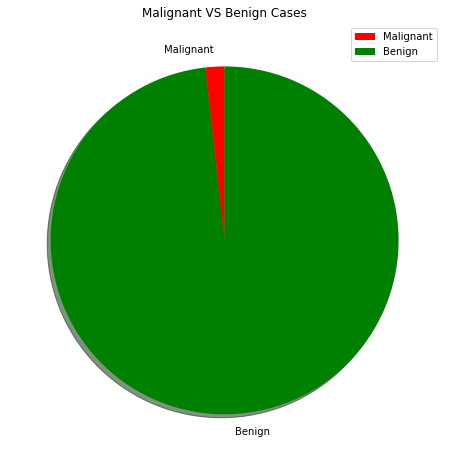

In [11]:
malignant = len(train[train["target"] == 1])
benign = len(train[train["target"] == 0])

labels = ["Malignant", "Benign"] 
size = [malignant, benign]

plt.figure(figsize = (8, 8))
plt.pie(size, labels = labels, shadow = True, startangle = 90, colors = ["r", "g"])
plt.title("Malignant VS Benign Cases")
plt.legend()

Highly imbalanced dataset!!

## Male VS Female Count

Number of males in training set =  17080
Number of females in training set=  15981
Number of males in testing set =  6255
Number of females in testing set=  4727


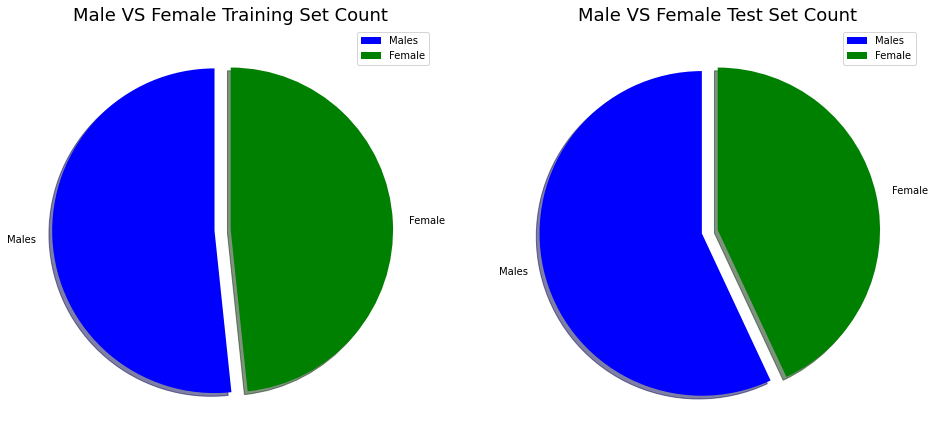

In [12]:
train_males = len(train[train["sex"] == "male"])
train_females  = len(train[train["sex"] == "female"])

test_males = len(test[test["sex"] == "male"])
test_females  = len(test[test["sex"] == "female"])

labels = ["Males", "Female"] 

size = [train_males, train_females]
explode = [0.1, 0.0]

plt.figure(figsize = (16, 16))
plt.subplot(1,2,1)
plt.pie(size, labels = labels, explode = explode, shadow = True, startangle = 90, colors = ["b", "g"])
plt.title("Male VS Female Training Set Count", fontsize = 18)
plt.legend()

print("Number of males in training set = ", train_males)
print("Number of females in training set= ", train_females)

size = [test_males, test_females]

plt.subplot(1,2,2)
plt.pie(size, labels = labels, explode = explode, shadow = True, startangle = 90, colors = ["b", "g"])
plt.title("Male VS Female Test Set Count", fontsize = 18)
plt.legend()

print("Number of males in testing set = ", test_males)
print("Number of females in testing set= ", test_females)

## Malignant male cases VS female cases

Malignant Male Cases =  364
Malignant Female Cases =  220


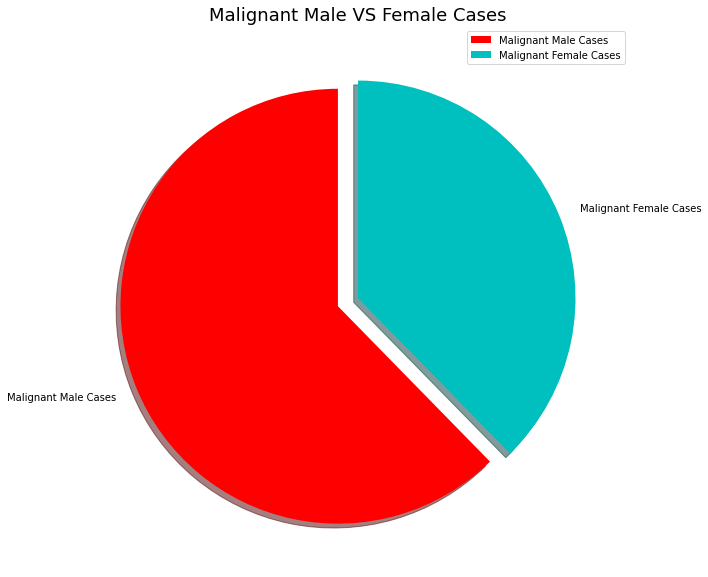

In [13]:
train_malignant  = train[train["target"] == 1]
train_malignant_males = len(train_malignant[train_malignant["sex"] == "male"])
train_malignant_females  = len(train_malignant[train_malignant["sex"] == "female"])

labels = ["Malignant Male Cases", "Malignant Female Cases"] 
size = [train_malignant_males, train_malignant_females]
explode = [0.1, 0.0]

plt.figure(figsize = (10, 10))
plt.pie(size, labels = labels, explode = explode, shadow = True, startangle = 90, colors = ["r", "c"])
plt.title("Malignant Male VS Female Cases", fontsize = 18)
plt.legend()
print("Malignant Male Cases = ", train_malignant_males)
print("Malignant Female Cases = ", train_malignant_females)

## Benign male cases vs female cases

Benign Male Cases =  16716
Benign Female Cases =  15761


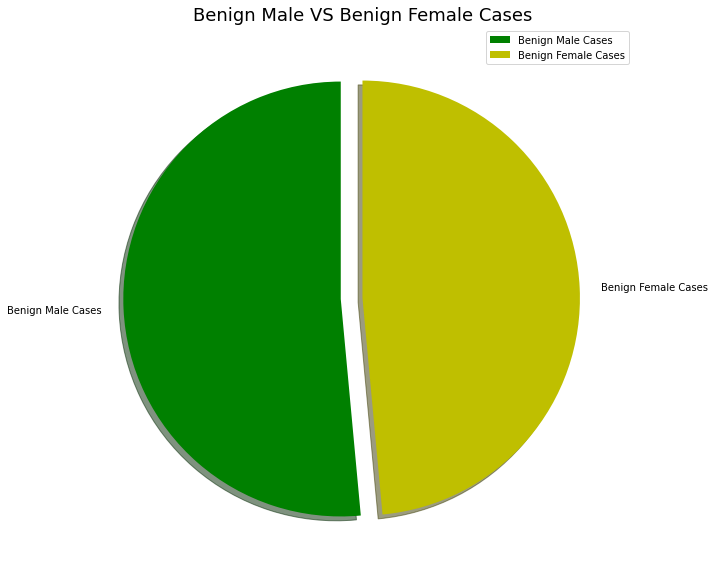

In [14]:
train_benign  = train[train["target"] == 0]

train_benign_males = len(train_benign[train_benign["sex"] == "male"])
train_benign_females  = len(train_benign[train_benign["sex"] == "female"]) 

labels = ["Benign Male Cases", "Benign Female Cases"] 
size = [train_benign_males, train_benign_females]
explode = [0.1, 0.0]

plt.figure(figsize = (10, 10))
plt.pie(size, labels = labels, explode = explode, shadow = True, startangle = 90, colors = ["g", "y"])
plt.title("Benign Male VS Benign Female Cases", fontsize = 18)
plt.legend()
print("Benign Male Cases = ", train_benign_males)
print("Benign Female Cases = ", train_benign_females)

## Analysis of Cancer VS Sex

In [15]:
cancer_versus_sex = train.groupby(["benign_malignant", "sex"]).size()
print(cancer_versus_sex)
print(type(cancer_versus_sex))

benign_malignant  sex   
benign            female    15761
                  male      16716
malignant         female      220
                  male        364
dtype: int64
<class 'pandas.core.series.Series'>


In [16]:
cancer_versus_sex = cancer_versus_sex.unstack(level = 1) / len(train) * 100
print(cancer_versus_sex)
print(type(cancer_versus_sex))

sex                  female       male
benign_malignant                      
benign            47.578941  50.461873
malignant          0.664131   1.098835
<class 'pandas.core.frame.DataFrame'>


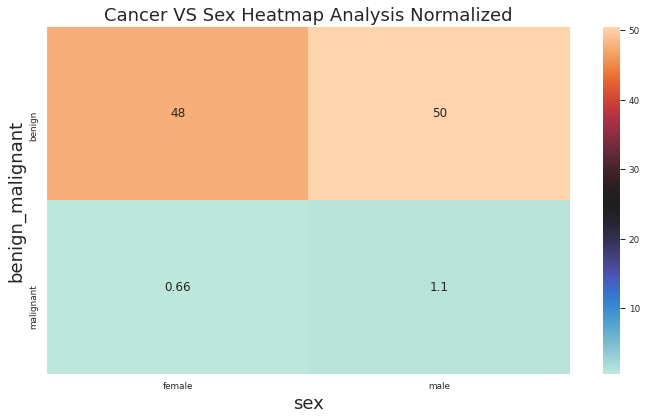

In [17]:
sns.set(style='whitegrid')
sns.set_context("paper", rc={"font.size":12,"axes.titlesize":20,"axes.labelsize":18})   

plt.figure(figsize = (10, 6))
sns.heatmap(cancer_versus_sex, annot=True, cmap="icefire", cbar=True)
plt.title("Cancer VS Sex Heatmap Analysis Normalized", fontsize = 18)
plt.tight_layout()

## Analysis of Age VS Cancer : 

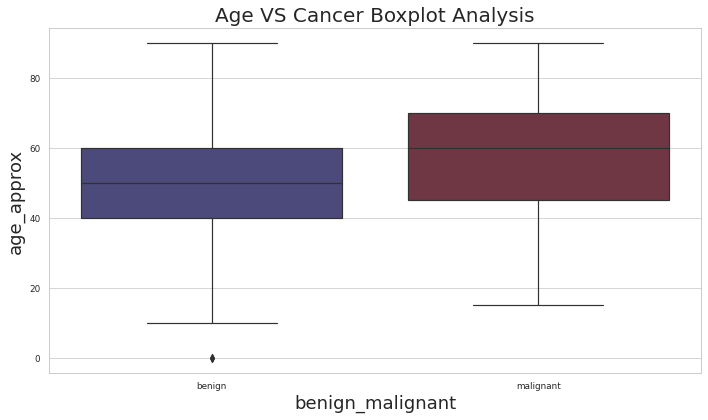

In [18]:
sns.set(style='whitegrid')
sns.set_context("paper", rc={"font.size":12,"axes.titlesize":20,"axes.labelsize":18})   

plt.figure(figsize = (10, 6))
sns.boxplot(train["benign_malignant"], train["age_approx"], palette="icefire")
plt.title("Age VS Cancer Boxplot Analysis")
plt.tight_layout()

## Inference : 

* The malignant cases belong to relatively higher age group.
* Age **might prove to be** a contributing factor in deciding whether the case is malignant or benign.
* From sex analysis we can hypothesize that sex **might be** a deciding factor as well. 

In [19]:
print("################### Training set info ###################")
print(train["anatom_site_general_challenge"].unique())
print(train["anatom_site_general_challenge"].value_counts())

print("\n\n")

print("################### Test set info ###################")
print(test["anatom_site_general_challenge"].unique())
print(test["anatom_site_general_challenge"].value_counts())

################### Training set info ###################
['head/neck' 'upper extremity' 'lower extremity' 'torso' nan 'palms/soles'
 'oral/genital']
torso              16845
lower extremity     8417
upper extremity     4983
head/neck           1855
palms/soles          375
oral/genital         124
Name: anatom_site_general_challenge, dtype: int64



################### Test set info ###################
[nan 'lower extremity' 'torso' 'upper extremity' 'head/neck' 'palms/soles'
 'oral/genital']
torso              5847
lower extremity    2501
upper extremity    1573
head/neck           576
palms/soles         108
oral/genital         26
Name: anatom_site_general_challenge, dtype: int64


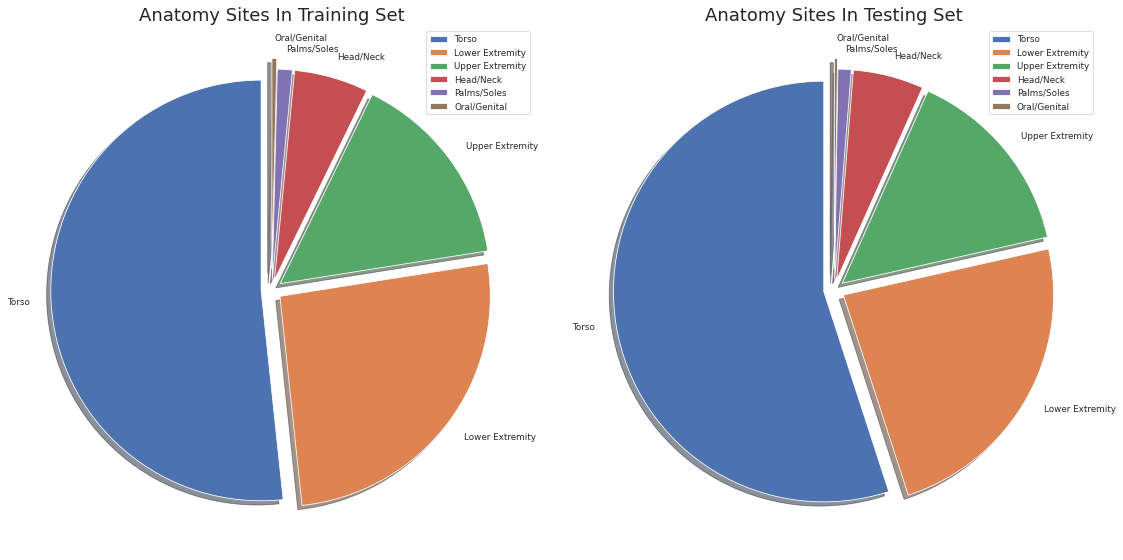

In [20]:
# train
train_torso = len(train[train["anatom_site_general_challenge"] == "torso"])
train_lower_extremity = len(train[train["anatom_site_general_challenge"] == "lower extremity"])
train_upper_extremity = len(train[train["anatom_site_general_challenge"] == "upper extremity"])
train_head_neck = len(train[train["anatom_site_general_challenge"] == "head/neck"])
train_palms_soles = len(train[train["anatom_site_general_challenge"] == "palms/soles"])
train_oral_genital = len(train[train["anatom_site_general_challenge"] == "oral/genital"])

# test
test_torso = len(test[test["anatom_site_general_challenge"] == "torso"])
test_lower_extremity = len(test[test["anatom_site_general_challenge"] == "lower extremity"])
test_upper_extremity = len(test[test["anatom_site_general_challenge"] == "upper extremity"])
test_head_neck = len(test[test["anatom_site_general_challenge"] == "head/neck"])
test_palms_soles = len(test[test["anatom_site_general_challenge"] == "palms/soles"])
test_oral_genital = len(test[test["anatom_site_general_challenge"] == "oral/genital"])

################# DISPLAY #################

labels = ["Torso", "Lower Extremity", "Upper Extremity", "Head/Neck", "Palms/Soles", "Oral/Genital"] 

plt.figure(figsize = (16, 16))

plt.subplot(1,2,1)
size = [train_torso, train_lower_extremity, train_upper_extremity, train_head_neck, train_palms_soles, train_oral_genital]
explode = [0.05, 0.05, 0.05, 0.05, 0.05, 0.1]
plt.pie(size, labels = labels, explode = explode, shadow = True, startangle = 90)
plt.title("Anatomy Sites In Training Set", fontsize = 18)
plt.legend()

plt.subplot(1,2,2)
size = [test_torso, test_lower_extremity, test_upper_extremity, test_head_neck, test_palms_soles, test_oral_genital]
explode = [0.05, 0.05, 0.05, 0.05, 0.05, 0.1]
plt.pie(size, labels = labels, explode = explode, shadow = True, startangle = 90)
plt.title("Anatomy Sites In Testing Set", fontsize = 18)
plt.legend()

# Automatically adjust subplot parameters to give specified padding.
plt.tight_layout()

It seems like majority of the cases are observed at the torso, and after that the extremities of the body (upper/lower) in both the training and testing set. 

**However, the testing set has missing values as we previously explored.**

Text(0.5, 1.0, 'Probabilistic Age Distribution In Training Set')

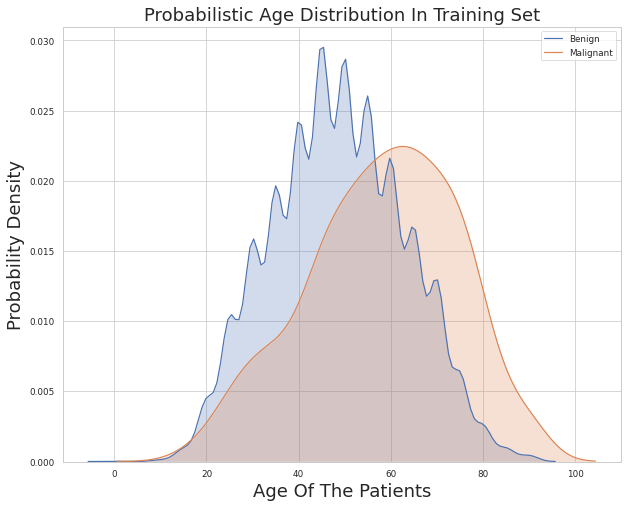

In [21]:
train_ages_benign = train.loc[train["target"] == 0, "age_approx"]
train_ages_malignant = train.loc[train["target"] == 1 , "age_approx"]

plt.figure(figsize = (10, 8))
sns.kdeplot(train_ages_benign, label = "Benign", shade = True, legend = True, cbar = True)
sns.kdeplot(train_ages_malignant, label = "Malignant", shade = True, legend = True, cbar = True)
plt.grid(True)
plt.xlabel("Age Of The Patients", fontsize = 18)
plt.ylabel("Probability Density", fontsize = 18)
plt.grid(which = "minor", axis = "both")
plt.title("Probabilistic Age Distribution In Training Set", fontsize = 18)

# Getting Insights Into Images : 

Using the external dataset compiled in my previous notebook; we will explore various attributes related to our images in the training as well as test set.

*The dataset can be accessed at : https://www.kaggle.com/fireheart7/melanoma-image-insights* 

In [22]:
train_image_stats_01 = pd.DataFrame(pd.read_csv("../input/melanoma-image-insights/melanoma_image_statistics_compiled_01"))
train_image_stats_02 = pd.DataFrame(pd.read_csv("../input/melanoma-image-insights/melanoma_image_statistics_compiled_02"))
train_image_stats_03 = pd.DataFrame(pd.read_csv("../input/melanoma-image-insights/melanoma_image_statistics_compiled_03"))
train_image_stats_04 = pd.DataFrame(pd.read_csv("../input/melanoma-image-insights/melanoma_image_statistics_compiled_04"))
train_image_stats_05 = pd.DataFrame(pd.read_csv("../input/melanoma-image-insights/melanoma_image_statistics_compiled_05"))
train_image_stats_06 = pd.DataFrame(pd.read_csv("../input/melanoma-image-insights/melanoma_image_statistics_compiled_06"))

print(train_image_stats_01.shape)
print(train_image_stats_02.shape)
print(train_image_stats_03.shape)
print(train_image_stats_04.shape)
print(train_image_stats_05.shape)
print(train_image_stats_06.shape)

(5000, 11)
(5000, 11)
(5000, 11)
(5000, 11)
(5000, 11)
(8126, 11)


Combining all the pieces in one dataframe.

In [23]:
train_image_statistics = pd.concat([train_image_stats_01, train_image_stats_02, train_image_stats_03,
                                   train_image_stats_04, train_image_stats_05, train_image_stats_06],
                                  ignore_index = True)
train_image_statistics.shape

(33126, 11)

In [24]:
train_image_statistics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33126 entries, 0 to 33125
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   image_name                33126 non-null  object 
 1   path                      33126 non-null  object 
 2   rows                      33126 non-null  int64  
 3   columns                   33126 non-null  int64  
 4   channels                  33126 non-null  int64  
 5   image_mean                33126 non-null  float64
 6   image_standard_deviation  33126 non-null  float64
 7   image_skewness            33126 non-null  float64
 8   mean_red_value            33126 non-null  float64
 9   mean_green_value          33126 non-null  float64
 10  mean_blue_value           33126 non-null  float64
dtypes: float64(6), int64(3), object(2)
memory usage: 2.8+ MB


Similarily, working for the test dataframe.

In [25]:
test_image_stats_01 = pd.DataFrame(pd.read_csv("../input/melanoma-image-insights/melanoma_image_statistics_compiled_test_01"))
test_image_stats_02 = pd.DataFrame(pd.read_csv("../input/melanoma-image-insights/melanoma_image_statistics_compiled_test_02"))

print(test_image_stats_01.shape)
print(test_image_stats_02.shape)

(5000, 11)
(5982, 11)


In [26]:
test_image_statistics = pd.concat([test_image_stats_01, test_image_stats_02], ignore_index = True)

test_image_statistics.shape

(10982, 11)

In [27]:
test_image_statistics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10982 entries, 0 to 10981
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   image_name                10982 non-null  object 
 1   path                      10982 non-null  object 
 2   rows                      10982 non-null  int64  
 3   columns                   10982 non-null  int64  
 4   channels                  10982 non-null  int64  
 5   image_mean                10982 non-null  float64
 6   image_standard_deviation  10982 non-null  float64
 7   image_skewness            10982 non-null  float64
 8   mean_red_value            10982 non-null  float64
 9   mean_green_value          10982 non-null  float64
 10  mean_blue_value           10982 non-null  float64
dtypes: float64(6), int64(3), object(2)
memory usage: 943.9+ KB


In [28]:
train_image_statistics.head()

image_name                                               path  rows  \
0  ISIC_2637011.jpg  /kaggle/input/siim-isic-melanoma-classificatio...  4000   
1  ISIC_0015719.jpg  /kaggle/input/siim-isic-melanoma-classificatio...  4000   
2  ISIC_0052212.jpg  /kaggle/input/siim-isic-melanoma-classificatio...  1053   
3  ISIC_0068279.jpg  /kaggle/input/siim-isic-melanoma-classificatio...  1053   
4  ISIC_0074268.jpg  /kaggle/input/siim-isic-melanoma-classificatio...  4000   

   columns  channels  image_mean  image_standard_deviation  image_skewness  \
0     6000         3  169.862452                 41.270046       -0.129492   
1     6000         3  171.084778                 41.994142       -0.205430   
2     1872         3  158.691048                 37.364873       -0.551454   
3     1872         3   80.342856                 44.885518        0.453018   
4     6000         3  183.955453                 37.497829       -0.157002   

   mean_red_value  mean_green_value  mean_blue_value  
0      212.933646        138.914514       157.739197  
1      217.279705        165.095320       130.879309  
2      199.940391        130.224750       145.908002  
3      119.689502         62.614801        58.724265  
4      226.269270        173.175601       152.421488

In [29]:
test_image_statistics.head()

image_name                                               path  rows  \
0  ISIC_0052060.jpg  /kaggle/input/siim-isic-melanoma-classificatio...  4000   
1  ISIC_0052349.jpg  /kaggle/input/siim-isic-melanoma-classificatio...  4000   
2  ISIC_0058510.jpg  /kaggle/input/siim-isic-melanoma-classificatio...  4000   
3  ISIC_0073313.jpg  /kaggle/input/siim-isic-melanoma-classificatio...  4000   
4  ISIC_0073502.jpg  /kaggle/input/siim-isic-melanoma-classificatio...  1080   

   columns  channels  image_mean  image_standard_deviation  image_skewness  \
0     6000         3  189.424321                 38.620205       -1.157524   
1     6000         3  206.967936                 31.067482       -1.709788   
2     6000         3  218.997725                 24.996260       -0.820638   
3     6000         3  216.520168                 24.706621       -0.767840   
4     1920         3  146.340647                 68.179568       -0.818278   

   mean_red_value  mean_green_value  mean_blue_value  
0      218.487621        174.538942       175.246401  
1      232.954911        194.728591       193.220306  
2      245.152620        205.469878       206.370678  
3      239.212384        195.463032       214.885089  
4      171.169355        143.861384       123.991202

## Let The Image Analysis Begin!!

We generate 4 random samples from the training data set. These 4 samples are taken from the aforementioned array of names.

In [30]:
image_names = train_image_statistics["image_name"].values
random_images = [np.random.choice(image_names) for i in range(4)] # Generates a random sample from a given 1-D array
random_images 

['ISIC_1850474.jpg',
 'ISIC_4116224.jpg',
 'ISIC_4785358.jpg',
 'ISIC_6111487.jpg']

## Sample Images

Earlier we extracted paths of all directories. So, we will access these images from there.

In [31]:
train_dir = "/kaggle/input/siim-isic-melanoma-classification/jpeg/train/"

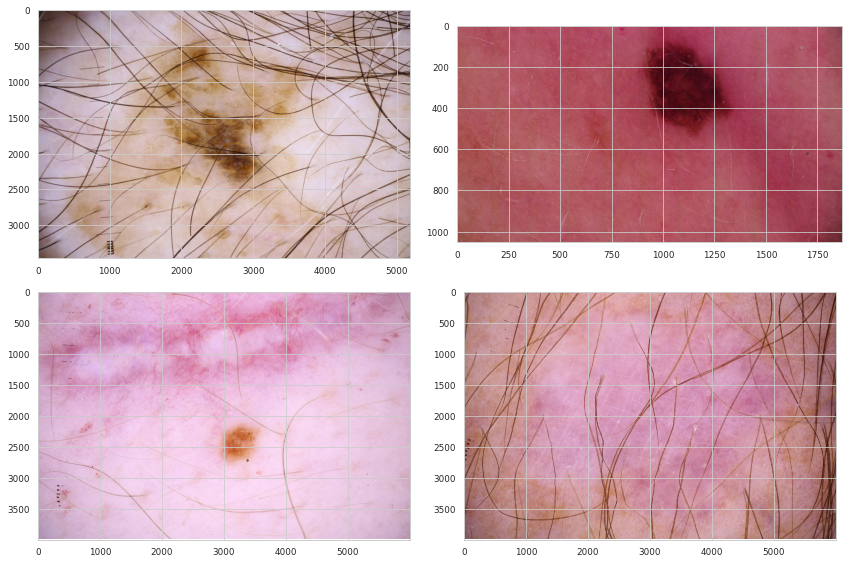

In [32]:
plt.figure(figsize = (12, 8))
for i in range(4) : 
    plt.subplot(2, 2, i + 1) 
    image = cv2.imread(os.path.join(train_dir, random_images[i]))
    # cv2 reads images in BGR format. Hence we convert it to RGB
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image, cmap = "gray")
    plt.grid(True)
# Automatically adjust subplot parameters to give specified padding.
plt.tight_layout()

# Analysis of color distribution

In [33]:
benign_mean_red_value = []
benign_mean_green_value = []
benign_mean_blue_value = []

malignant_mean_red_value = []
malignant_mean_green_value = []
malignant_mean_blue_value = []

for image_name in tqdm(train_image_statistics["image_name"]) : 
    name = image_name[0:len(image_name)-4] # as .jpg are the appended at the end of the name
    extracted_section = train[train["image_name"] == name]
    r = int(train_image_statistics[train_image_statistics["image_name"] == image_name]["mean_red_value"])
    g = int(train_image_statistics[train_image_statistics["image_name"] == image_name]["mean_green_value"])
    b = int(train_image_statistics[train_image_statistics["image_name"] == image_name]["mean_blue_value"])
    if int(extracted_section["target"]) == 0 : # benign
        benign_mean_red_value.append(r)
        benign_mean_green_value.append(g)
        benign_mean_blue_value.append(b)
    else:
        malignant_mean_red_value.append(r)
        malignant_mean_green_value.append(g)
        malignant_mean_blue_value.append(b)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  if __name__ == '__main__':


### Skewness in EDA : 

Skewness is the measure of symmetry or asymmetry of a data distribution.
A distribution or data set is said to be symmetric if it looks same to the left and right point of the center. 

#### `Types of Skewness` : 

Skewness is generally classified into 2 broad categories-
* Right skewness or Positive skewness
* Left skewness or Negative skewness

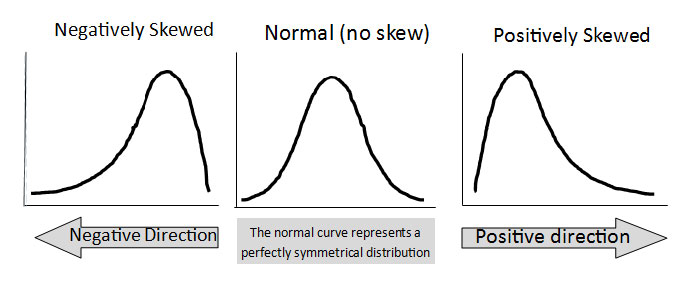

### Kurtosis : 

Kurtosis is the characteristics of being flat or peaked. It is a measure whether data is heavy- tailed or light-tailed in a normal distribution

A large kurtosis value often mean that the tails of the distributions are getting toward more extreme values than the tails of normal distributions. This may lead to a length of 6 or 7 standard deviation from the mean. Similarly, If the kurtosis value is very low, then the tails of the distributions will be less lengthier than the those of a normal distribution (less than 3 standard deviation).

A large value of kurtosis is often considered as more risky because data may tend to give an outlier value as outcome with greater distance from the mean if applied to any machine learning algorithm.

### `Types of Kurtosis` :

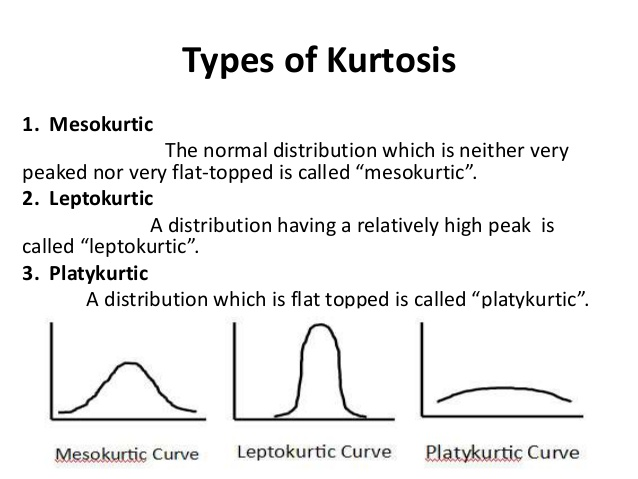

It is very difficult to interpret and analyse the data which is skewed. 

### `Some Transformations for highly skewed data` :

We can perform a number of transformations so that the data information remains preserved while at the same time some symmetric nature starts developing in its distribution. 

* Taking the square root of each data point and plotting it again.
* Taking the cube root of each data point and plotting it again.
* Taking the logarithm of each data point and plotting it again.
* Taking the reciprocal of each data point and plotting it again.

Channel plotting

The range of spread = 218.00


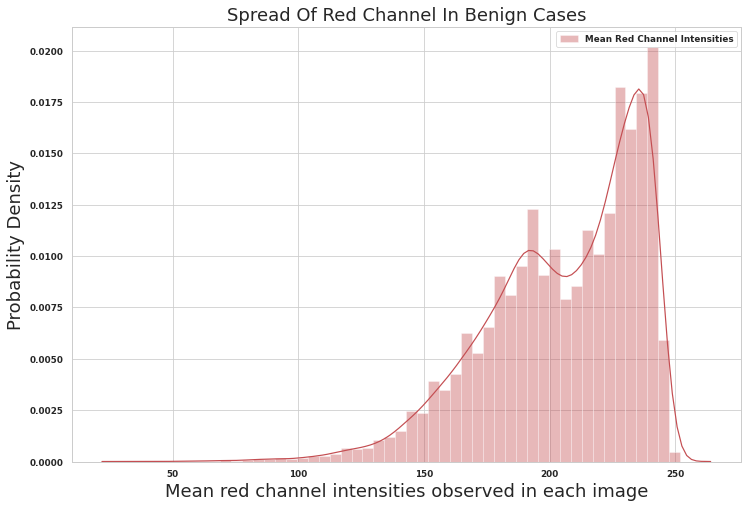

In [34]:
#red channel plot
range_of_spread = max(benign_mean_red_value) - min(benign_mean_red_value)

plt.figure(figsize = (12, 8))
plt.rc("font", weight = "bold")
sns.set_style("whitegrid")
fig = sns.distplot(benign_mean_red_value, hist = True, kde = True, label = "Mean Red Channel Intensities", color = "r")
fig.set(xlabel = "Mean red channel intensities observed in each image",
        ylabel = "Probability Density")
plt.title("Spread Of Red Channel In Benign Cases", fontsize = 18)
plt.legend()
print("The range of spread = {:.2f}".format(range_of_spread))

The range of spread = 236.00


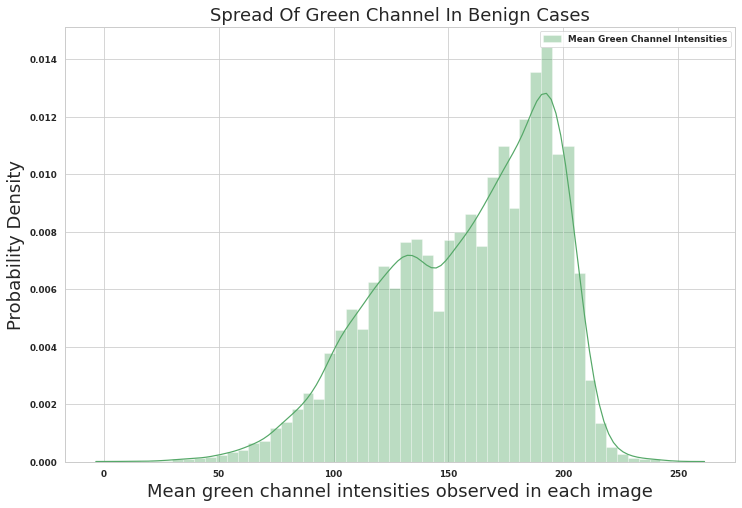

In [35]:
#green channel plot
range_of_spread = max(benign_mean_green_value) - min(benign_mean_green_value)

plt.figure(figsize = (12, 8))
plt.rc("font", weight = "bold")
sns.set_style("whitegrid")
fig = sns.distplot(benign_mean_green_value, hist = True, kde = True, label = "Mean Green Channel Intensities", color = "g")
fig.set(xlabel = "Mean green channel intensities observed in each image",
        ylabel = "Probability Density") 
plt.title("Spread Of Green Channel In Benign Cases", fontsize = 18)
plt.legend()
print("The range of spread = {:.2f}".format(range_of_spread))

The range of spread = 242.00


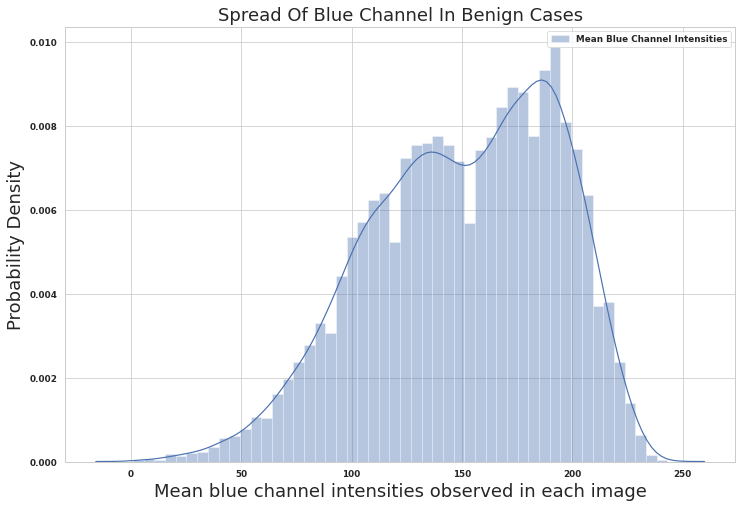

In [36]:
#Blue channel plot
range_of_spread = max(benign_mean_blue_value) - min(benign_mean_blue_value)

plt.figure(figsize = (12, 8))
plt.rc("font", weight = "bold")
sns.set_style("whitegrid")
fig = sns.distplot(benign_mean_blue_value, hist = True, kde = True, label = "Mean Blue Channel Intensities", color = "b")
fig.set(xlabel = "Mean blue channel intensities observed in each image",
        ylabel = "Probability Density") 
plt.title("Spread Of Blue Channel In Benign Cases", fontsize = 18)
plt.legend()
print("The range of spread = {:.2f}".format(range_of_spread))

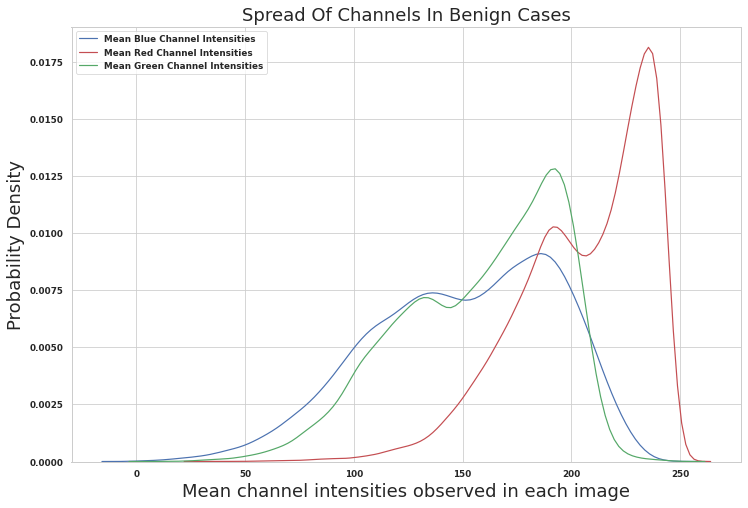

In [37]:
plt.figure(figsize = (12, 8))
plt.rc("font", weight = "bold")
sns.set_style("whitegrid")
fig = sns.distplot(benign_mean_blue_value, hist = False, kde = True, label = "Mean Blue Channel Intensities", color = "b")
fig = sns.distplot(benign_mean_red_value, hist = False, kde = True, label = "Mean Red Channel Intensities", color = "r")
fig = sns.distplot(benign_mean_green_value, hist = False, kde = True, label = "Mean Green Channel Intensities", color = "g")

fig.set(xlabel = "Mean channel intensities observed in each image",
        ylabel = "Probability Density") 
plt.title("Spread Of Channels In Benign Cases", fontsize = 18)
plt.legend()

Malignant Cases 

In [38]:
# free up the memory
del benign_mean_red_value
del benign_mean_green_value
del benign_mean_blue_value

In [39]:
import gc
gc.collect()

5844

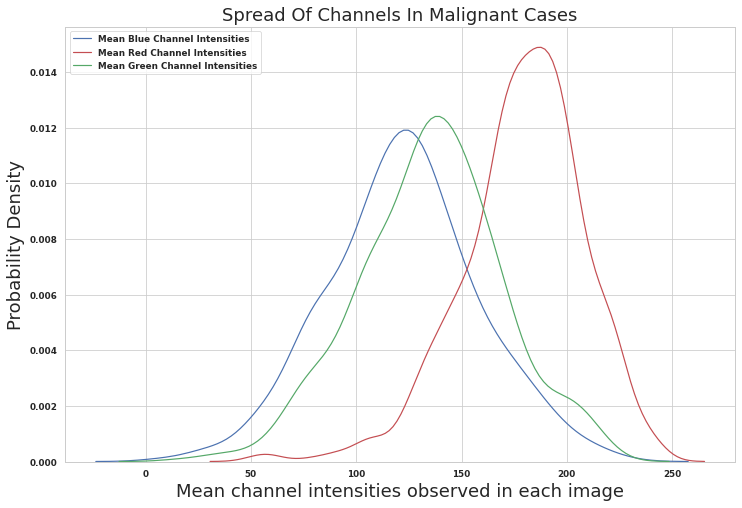

In [40]:
plt.figure(figsize = (12, 8))
plt.rc("font", weight = "bold")
sns.set_style("whitegrid")
fig = sns.distplot(malignant_mean_blue_value, hist = False, kde = True, label = "Mean Blue Channel Intensities", color = "b")
fig = sns.distplot(malignant_mean_red_value, hist = False, kde = True, label = "Mean Red Channel Intensities", color = "r")
fig = sns.distplot(malignant_mean_green_value, hist = False, kde = True, label = "Mean Green Channel Intensities", color = "g")

fig.set(xlabel = "Mean channel intensities observed in each image",
        ylabel = "Probability Density") 
plt.title("Spread Of Channels In Malignant Cases", fontsize = 18)
plt.legend()

So, we observe that in both the cases the component of red spikes the most, whereas Blue and Green are close to each other. All the channels also appears to be a bit negatively skewed. 

`**Hence, the channel distribution won't be a powerful feature to differentiate between the malignant and benign cases.**`

Kutosis of this distribution is manageable. 

In [41]:
gc.collect() # free up the memory

20

# Dealing with missing values : 

Filling the areas of missing values in the dataframe.

In [42]:
train.head()

image_name  patient_id     sex  age_approx anatom_site_general_challenge  \
0  ISIC_2637011  IP_7279968    male        45.0                     head/neck   
1  ISIC_0015719  IP_3075186  female        45.0               upper extremity   
2  ISIC_0052212  IP_2842074  female        50.0               lower extremity   
3  ISIC_0068279  IP_6890425  female        45.0                     head/neck   
4  ISIC_0074268  IP_8723313  female        55.0               upper extremity   

  diagnosis benign_malignant  target  
0   unknown           benign       0  
1   unknown           benign       0  
2     nevus           benign       0  
3   unknown           benign       0  
4   unknown           benign       0

Sex feature column

Count of missing data =  65
Count of available data =  33061


Text(0.5, 1.0, "Data On Patient's Sex")

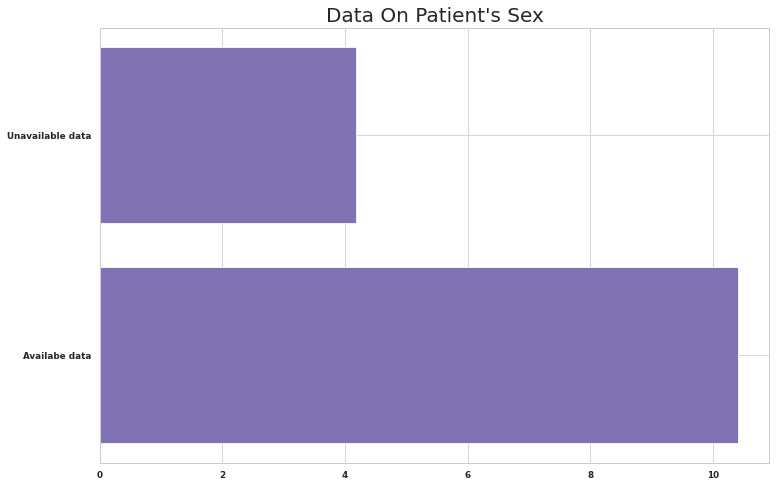

In [43]:
# visualizing missing values in "sex" column

missing = len(train[train["sex"].isna() == True])
available = len(train[train["sex"].isna() == False])

x = ["Availabe data", "Unavailable data"]
y = [np.log(available), np.log(missing)] # plotting log data as the extreme values will supressed and lower ones will shoot, making it eay to visualize

print("Count of missing data = ", missing)
print("Count of available data = ", available)

plt.figure(figsize = (12, 8))
plt.subplot(1,1,1)
plt.barh(x, y, color = "m")
plt.grid(True)
plt.title("Data On Patient's Sex")

In the starting part of EDA, we saw that the male gender dominated the gender count slightly. So, we fill the missing values with the dominant gender in the dataset. 

In [44]:
train["sex"].fillna("male", inplace = True)

Age feature column

Missing age values =  68
Available age data =  33058


Text(0.5, 1.0, "Data On Patient's Age")

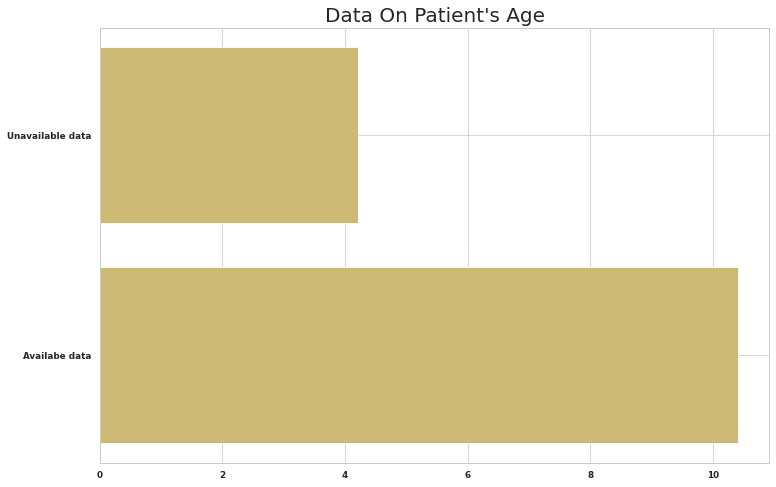

In [45]:
missing =  len(train[train["age_approx"].isna() == True]) 
available = len(train[train["age_approx"].isna() == False]) 

print("Missing age values = ", missing)
print("Available age data = ", available)

x = ["Availabe data", "Unavailable data"]
y = [np.log(available), np.log(missing)] # plotting log data as the extreme values will supressed and lower ones will shoot, making it eay to visualize

plt.figure(figsize = (12, 8))
plt.subplot(1,1,1)
plt.barh(x, y, color = "y")
plt.grid(True)
plt.title("Data On Patient's Age")

This is similar to the sex distribution part.

We know so far 

* Males are relatively dominant in count in the dataset
* Torso, lower extremity and upper extremity corresponds to more than 70% of overall locations(initial EDA steps)
* Number of malignant cases are far less than benign, and then also they male count dominates in both. 

Therefore, we fill the missing values with the median data at the union of the aforementioned cases. Let's see how...

In [46]:
# train
anatomy_sites = ["torso", "upper extremity", "lower extremity"]

# first select the relevant part of the full dataframe satisfying either of the aforementioned three conditions.
relevant_dataframe_part = train[(train["sex"] == "male") &
                     (train["anatom_site_general_challenge"].isin(anatomy_sites)) &
                     (train["target"] == 0)]

# Now, we have the data frame. To calculate median, we need to specify the column along which we intend to calculate the median.
median_value = relevant_dataframe_part["age_approx"].median()

print("Median value = ", median_value)

Median value =  50.0


In [47]:
train["age_approx"].fillna(median_value, inplace = True)

Anatomy feature column

We simply replace the missing values(if any) with "TORSO" class, as it is the dominant one here.

In [48]:
train["anatom_site_general_challenge"].fillna("torso", inplace = True)
test["anatom_site_general_challenge"].fillna("torso", inplace = True)

In [49]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33126 entries, 0 to 33125
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   image_name                     33126 non-null  object 
 1   patient_id                     33126 non-null  object 
 2   sex                            33126 non-null  object 
 3   age_approx                     33126 non-null  float64
 4   anatom_site_general_challenge  33126 non-null  object 
 5   diagnosis                      33126 non-null  object 
 6   benign_malignant               33126 non-null  object 
 7   target                         33126 non-null  int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 2.0+ MB


In [50]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10982 entries, 0 to 10981
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   image_name                     10982 non-null  object 
 1   patient_id                     10982 non-null  object 
 2   sex                            10982 non-null  object 
 3   age_approx                     10982 non-null  float64
 4   anatom_site_general_challenge  10982 non-null  object 
dtypes: float64(1), object(4)
memory usage: 429.1+ KB


So, now we have dealt with missing values!!! :-)

## Save these so that we can use these updated CSV files in the next notebook where we tackle preprocessing and model creation.

In [51]:
train.to_csv("updated_training_file", index = False)
test.to_csv("updated_test_file", index = False)

## Gaining more insights from the images : 

Let's analyze the information presented by the *melanoma-image-insights* dataset.

Shape related information : 

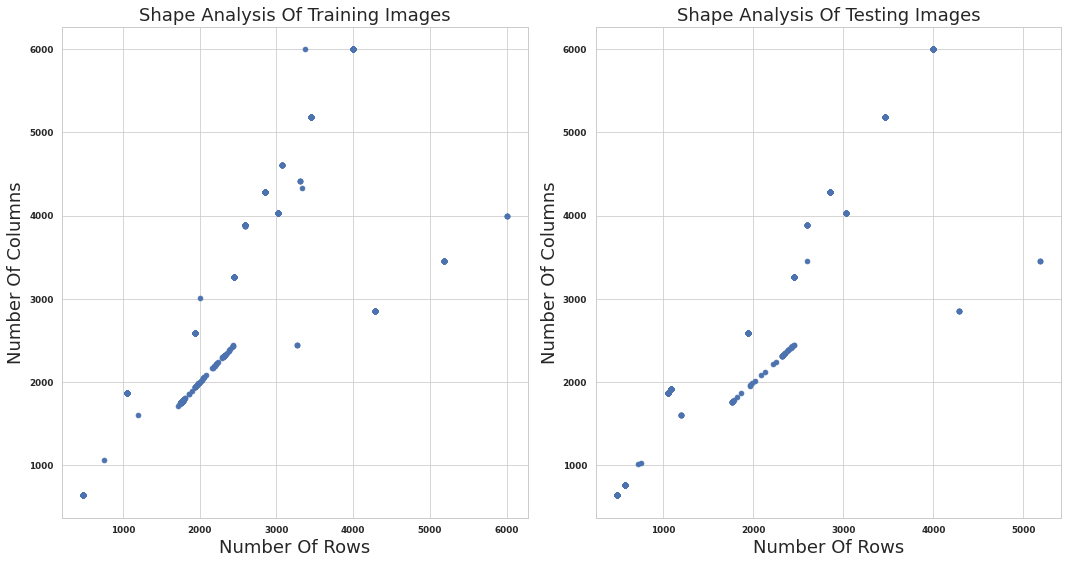

In [52]:
plt.figure(figsize = (15, 8))

plt.subplot(1,2,1)
x = train_image_statistics["rows"]
y = train_image_statistics["columns"]
plt.scatter(x, y, cmap = "magma")
plt.title("Shape Analysis Of Training Images", fontsize = 18)
plt.xlabel("Number Of Rows", fontsize = 18)
plt.ylabel("Number Of Columns", fontsize = 18)

plt.subplot(1,2,2)
x = test_image_statistics["rows"]
y = test_image_statistics["columns"]
plt.scatter(x, y, cmap = "magma")
plt.title("Shape Analysis Of Testing Images", fontsize = 18)
plt.xlabel("Number Of Rows", fontsize = 18)
plt.ylabel("Number Of Columns", fontsize = 18)


plt.tight_layout()

It's a tad difficult to analyze like this! Therefore we'll plot them in one.

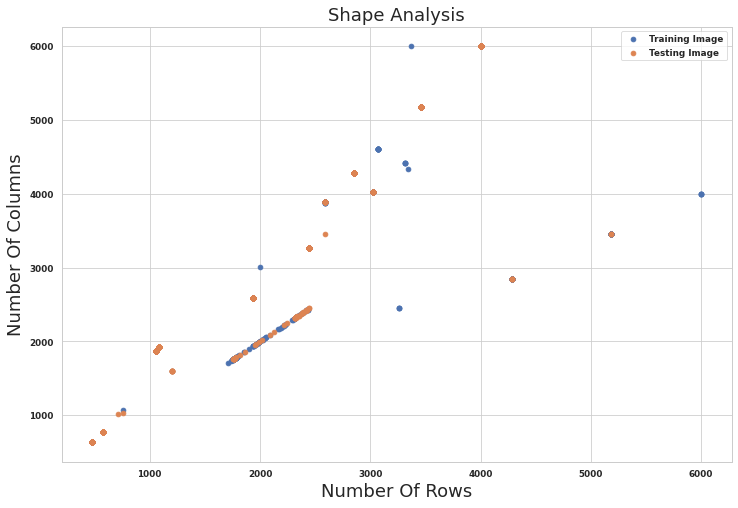

In [53]:
plt.figure(figsize = (12, 8))

x = train_image_statistics["rows"]
y = train_image_statistics["columns"]
plt.scatter(x, y, cmap = "plasma", label = "Training Image")
plt.title("Shape Analysis", fontsize = 18)

x = test_image_statistics["rows"]
y = test_image_statistics["columns"]
plt.scatter(x, y, cmap = "magma", label = "Testing Image")

plt.xlabel("Number Of Rows", fontsize = 18)
plt.ylabel("Number Of Columns", fontsize = 18)
plt.legend()

We observe that most common dimension in training and testing set's intersection is 1800 X 1800 to 2500 X 2500. We will reshape the images accordingly later in the preprocessing segment.

Let's analyze Image mean, standard deviation and skewness with one another. For this we will use plotly's express. Plotly Express is the easy-to-use, high-level interface to Plotly, which operates on a variety of types of data and produces easy-to-style figures.

mpltoolkit can also be used if you are adamant using matplotlib.

In [54]:
train_image_statistics.head()

image_name                                               path  rows  \
0  ISIC_2637011.jpg  /kaggle/input/siim-isic-melanoma-classificatio...  4000   
1  ISIC_0015719.jpg  /kaggle/input/siim-isic-melanoma-classificatio...  4000   
2  ISIC_0052212.jpg  /kaggle/input/siim-isic-melanoma-classificatio...  1053   
3  ISIC_0068279.jpg  /kaggle/input/siim-isic-melanoma-classificatio...  1053   
4  ISIC_0074268.jpg  /kaggle/input/siim-isic-melanoma-classificatio...  4000   

   columns  channels  image_mean  image_standard_deviation  image_skewness  \
0     6000         3  169.862452                 41.270046       -0.129492   
1     6000         3  171.084778                 41.994142       -0.205430   
2     1872         3  158.691048                 37.364873       -0.551454   
3     1872         3   80.342856                 44.885518        0.453018   
4     6000         3  183.955453                 37.497829       -0.157002   

   mean_red_value  mean_green_value  mean_blue_value  
0      212.933646        138.914514       157.739197  
1      217.279705        165.095320       130.879309  
2      199.940391        130.224750       145.908002  
3      119.689502         62.614801        58.724265  
4      226.269270        173.175601       152.421488

In [55]:
fig = go.Figure(data = [go.Scatter3d(x = train_image_statistics["image_mean"],
                                    y = train_image_statistics["image_standard_deviation"], 
                                   z = train_image_statistics["image_skewness"],
                                    mode = "markers",
                                    marker = dict(size = 4, color = train_image_statistics["rows"],

                                                  colorscale = "jet", opacity = 0.4))] , 
               
                layout = go.Layout(margin=dict(l=0, r=0, b=0, t=0),
                                   scene = dict(xaxis = dict(title='Image Mean'),
                                                yaxis = dict(title='Image Standard Deviation'),
                                                zaxis = dict(title='Image Skewness'),),))
fig.show()

Repeating for the test data : 

In [56]:
fig = go.Figure(data = [go.Scatter3d(x = test_image_statistics["image_mean"],
                                    y = test_image_statistics["image_standard_deviation"], 
                                   z = test_image_statistics["image_skewness"],
                                    mode = "markers",
                                    marker = dict(size = 4, color = test_image_statistics["rows"],

                                                  colorscale = "jet", opacity = 0.4))] , 
               
                layout = go.Layout(margin=dict(l=0, r=0, b=0, t=0),
                                   scene = dict(xaxis = dict(title='Image Mean'),
                                                yaxis = dict(title='Image Standard Deviation'),
                                                zaxis = dict(title='Image Skewness'),),))

fig.show()

## Reached the end! 

Thank you for reading this far. That's it so far in EDA. Now, we dive into the most exciting part of the ML world, that is Model construction and pre-processing.

**Link :**  Will be here by tomorrow!

## In case you haven't explored the previous book where custom dataset creation is discussed : 

**Link** : **https://www.kaggle.com/fireheart7/melanoma-a-story-in-3-parts-part-one?scriptVersionId=38737538**

## Do upvote folks if you find it useful! Keeps me motivated to learn and explore more!

## This notebook will be updated from here on!